In [1]:
from numpy import asarray
from numpy import savetxt
import pickle
import csv
import numpy as np
import pandas as pd
from scipy import stats

#Import funcions
from fuctionscorr import plotbar_info
from fuctionscorr import calcul
from fuctionscorr import plotbar_info_rac

In [2]:
#Feature_array_EC_norm = Eyes closed normalised features
#Feature_array_EO_norm = Eyes open normalised features
#Feature_array_EC_no_norm = Eyes closed raw features
#Feature_array_EO_no_norm = Eyes open raw features

with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Feature_array_EC_norm.p", "rb") as fp:   # Unpickling
    Feature_array_EC_norm = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Feature_array_EO_norm.p", "rb") as fp:   # Unpickling
    Feature_array_EO_norm = pickle.load(fp)

with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Sub_idx_EC", "rb") as fp:   # Unpickling
    Sub_idx_EC = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/Sub_idx_EO", "rb") as fp:   # Unpickling
    Sub_idx_EO = pickle.load(fp)


with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/namesec.txt", "rb") as fp:   # Unpickling
    Old_EC = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/5.EEGAllChanels/Features/nameseo.txt", "rb") as fp:   # Unpickling
    Old_EO = pickle.load(fp)

In [3]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']

<ipython-input-3-7cd9a6c37a48>:3: DeprecationWarning: 'U' mode is deprecated
  with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:


In [4]:
NamesC= []
for i in Sub_idx_EC:
    hename = Old_EC[int(i)]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    NamesC.append(hename) #Add it in to the xCorr

NamesO= []
for i in Sub_idx_EO:
    hename = Old_EO[int(i)]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    NamesO.append(hename) #Add it in to the xCorr

In [5]:
len(Feature_array_EC_norm)

141

In [6]:
len(NamesC)

141

In [7]:
def outliers(listSelect, Names):
    listDel = []
    for i in range(0,3):
        X=np.array(listSelect)
        df=pd.DataFrame(X[:,i])  #Pas to Data frame
        df['z_score']=stats.zscore(df) #Get z-score
        for r in df['z_score']:        #Per cada linea en z-score
            if -3 < r > 3:  #Si el z-score es major que 2.5
                rows = list(df['z_score'][df['z_score'] == float(r)].index) #Select la posicio que tingui el z-score alt
                text = str(rows) #El guardem en string
                print(text[1:-1])
                listDel.append(text[1:-1])
    return listDel

In [8]:
'''delelementes = outliers(Feature_array_EO_norm, NamesO)
for i in delelementes:
    Feature_array_EO_norm = np.delete(Feature_array_EO_norm, int(i), 0)
    NamesO = np.delete(NamesO, int(i), 0)'''

'delelementes = outliers(Feature_array_EO_norm, NamesO)\nfor i in delelementes:\n    Feature_array_EO_norm = np.delete(Feature_array_EO_norm, int(i), 0)\n    NamesO = np.delete(NamesO, int(i), 0)'

In [9]:
'''delelementes = outliers(Feature_array_EC_norm, NamesC)
for i in delelementes:
    Feature_array_EC_norm = np.delete(Feature_array_EC_norm, int(i), 0)
    NamesC = np.delete(NamesC, int(i), 0)'''

'delelementes = outliers(Feature_array_EC_norm, NamesC)\nfor i in delelementes:\n    Feature_array_EC_norm = np.delete(Feature_array_EC_norm, int(i), 0)\n    NamesC = np.delete(NamesC, int(i), 0)'

In [10]:
len(Feature_array_EO_norm)

146

In [11]:
len(NamesO)

146

In [12]:
len(Feature_array_EC_norm)

141

In [13]:
thWell = 5.5
thEmot = 5.0

Emotionality EO
Valence


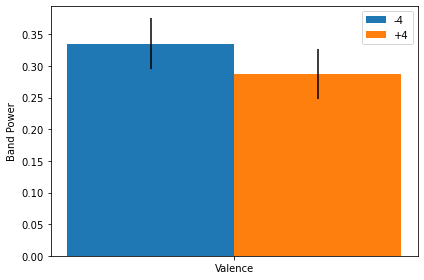

Arousal


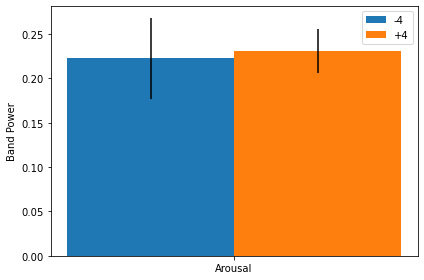

Motivation


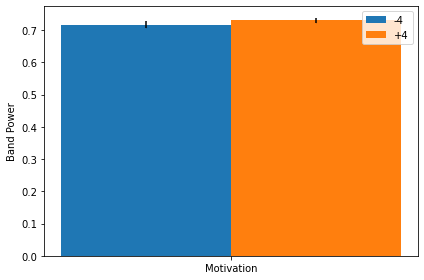

Max corr Emotionality EO:  [[0.28668019598641553, 0.23110611093219674, 0.730495396238799]]
Well EO
Valence


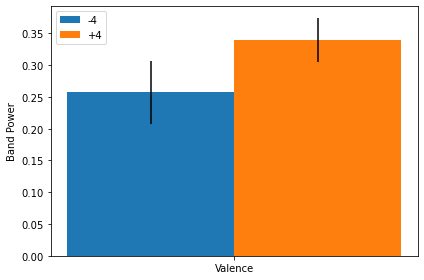

Arousal


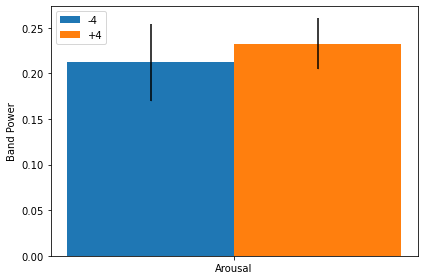

Motivation


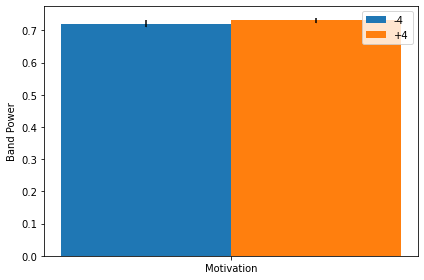

Max corr Well EO:  [[0.33953474656229726, 0.23274283948506413, 0.7306441394293031]]
Emotionality EC
Valence


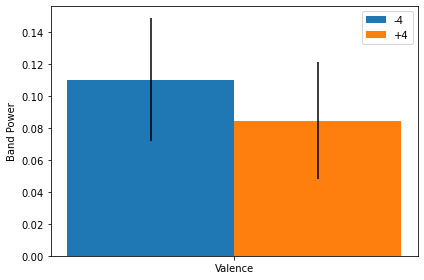

Arousal


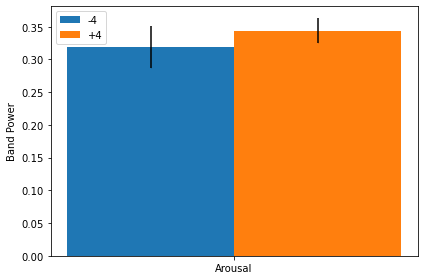

Motivation


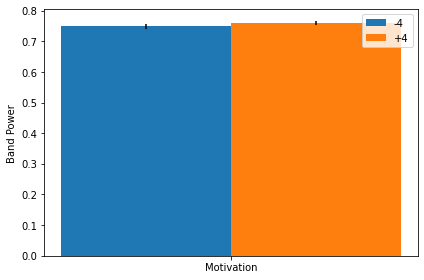

Max corr Emotionality EC:  [[0.0844343686405015, 0.34381343256625624, 0.7586671034251022]]
Well EC
Valence


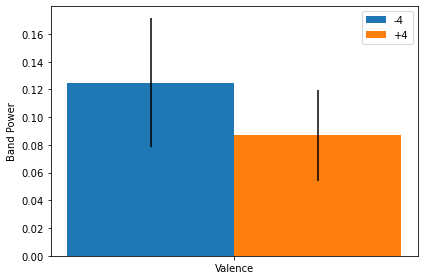

Arousal


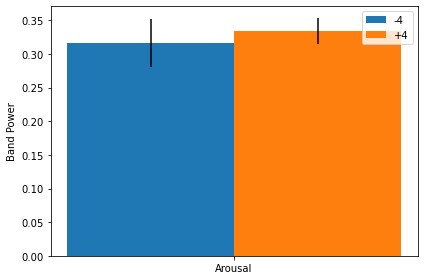

Motivation


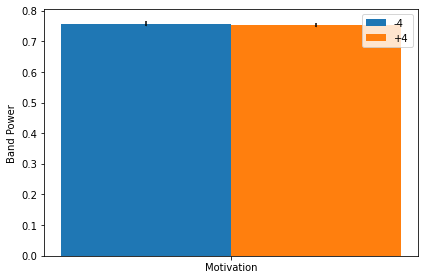

Max corr Well EC:  [[0.08695154598819735, 0.3340303109823972, 0.7534700043838614]]


In [14]:
#
bandPower_emotio_EO = []
bandPower_well_EO = []
bandPower_emotio_EC = []
bandPower_well_EC = []

print('Emotionality EO')
band_emotio = plotbar_info(names, NamesO, TeiQueSF_emotionality, Feature_array_EO_norm, thEmot)
bandPower_emotio_EO.append(band_emotio)
print('Max corr Emotionality EO: ', bandPower_emotio_EO)

print('Well EO')
band_well = plotbar_info(names, NamesO, TeiQueSF_wellBeing, Feature_array_EO_norm, thWell)
bandPower_well_EO.append(band_well)
print('Max corr Well EO: ', bandPower_well_EO)

print('Emotionality EC')
band_emotio = plotbar_info(names, NamesC, TeiQueSF_emotionality, Feature_array_EC_norm, thEmot)
bandPower_emotio_EC.append(band_emotio)
print('Max corr Emotionality EC: ', bandPower_emotio_EC)

print('Well EC')
band_well = plotbar_info(names, NamesC, TeiQueSF_wellBeing, Feature_array_EC_norm, thWell)
bandPower_well_EC.append(band_well)
print('Max corr Well EC: ', bandPower_well_EC)

Emotionality EO
Valence


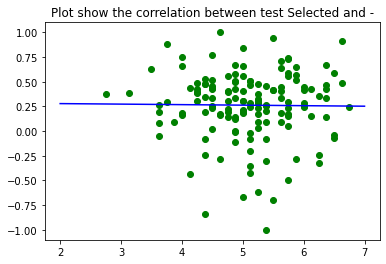

(-0.011890398586144393, 0.8867306357657518)
Arousal


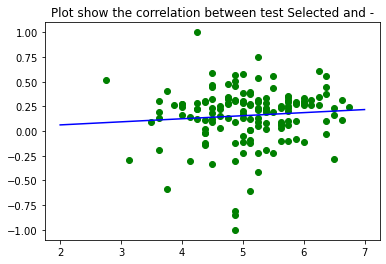

(0.08466119870286533, 0.3096305395075456)
Motivation


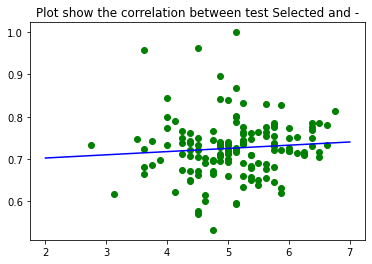

(0.08523105259343856, 0.30637349028476724)
Emotionality EC
Valence


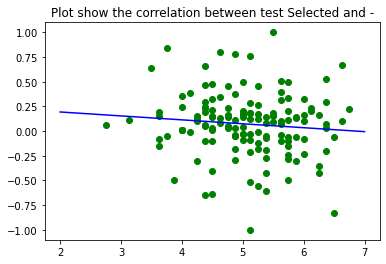

(-0.09901266800447153, 0.2427594219883533)
Arousal


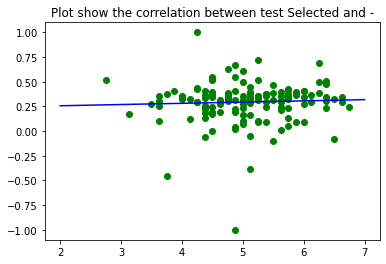

(0.04642316006085629, 0.5846313298458037)
Motivation


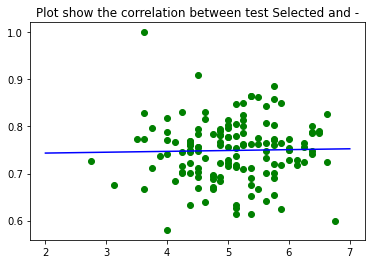

(0.022163550529136825, 0.7941951347857102)
Well EO
Valence


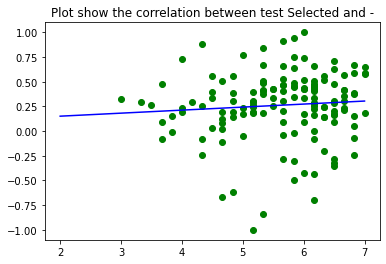

(0.08010559624848212, 0.33647904626213515)
Arousal


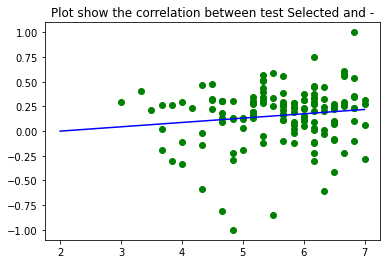

(0.13835124025916376, 0.0958421802103793)
Motivation


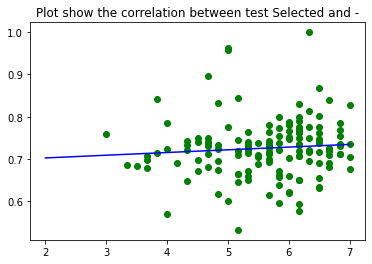

(0.08335566101985242, 0.31717747096081284)
Well EC
Valence


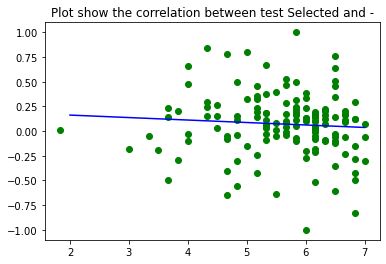

(-0.07485390035134101, 0.3776864273730578)
Arousal


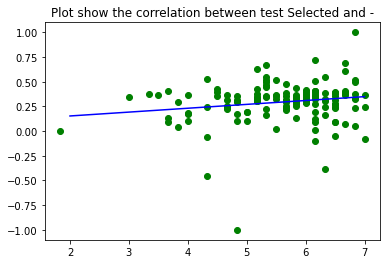

(0.17606222596183002, 0.03676579288111569)
Motivation


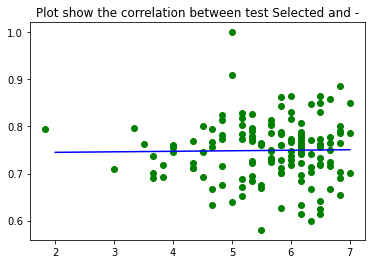

(0.016249634118363252, 0.8483307209527058)


In [15]:
save_corr = []
print('Emotionality EO')
cor = calcul(names, NamesO, TeiQueSF_emotionality, Feature_array_EO_norm, 2, 7)
save_corr.append(cor)

print('Emotionality EC')
cor = calcul(names, NamesC, TeiQueSF_emotionality, Feature_array_EC_norm, 2, 7)
save_corr.append(cor)

print('Well EO')
cor = calcul(names, NamesO, TeiQueSF_wellBeing, Feature_array_EO_norm, 2, 7)
save_corr.append(cor)

print('Well EC')
cor = calcul(names, NamesC, TeiQueSF_wellBeing, Feature_array_EC_norm, 2, 7)
save_corr.append(cor)

In [16]:
resu = []
print('Emotionality EO')
EOE = plotbar_info_rac(names, NamesO, TeiQueSF_emotionality, Feature_array_EO_norm, thEmot)
resu.append(EOE)

print('Emotionality EC')
ECE = plotbar_info_rac(names, NamesC, TeiQueSF_emotionality, Feature_array_EC_norm, thEmot)
save_corr.append(ECE)

print('Well EO')
EOW = plotbar_info_rac(names, NamesO, TeiQueSF_wellBeing, Feature_array_EO_norm, thWell)
resu.append(EOW)

print('Well EC')
ECW = plotbar_info_rac(names, NamesC, TeiQueSF_wellBeing, Feature_array_EC_norm, thWell)
resu.append(ECW)

Emotionality EO
Valence
RanksumsResult(statistic=0.6363954815882337, pvalue=0.5245186851826862)
Arousal
RanksumsResult(statistic=-0.18296370095661718, pvalue=0.8548265002342295)
Motivation
RanksumsResult(statistic=-1.6347408933297753, pvalue=0.10210337605963342)
Emotionality EC
Valence
RanksumsResult(statistic=1.394059617296964, pvalue=0.16329960242928865)
Arousal
RanksumsResult(statistic=-0.5701079628945792, pvalue=0.5686044746609051)
Motivation
RanksumsResult(statistic=-1.1402159257891584, pvalue=0.2541963541493093)
Well EO
Valence
RanksumsResult(statistic=-1.4922595175286348, pvalue=0.1356311249630112)
Arousal
RanksumsResult(statistic=-0.27664351001545734, pvalue=0.7820538518652154)
Motivation
RanksumsResult(statistic=-1.2741755826259384, pvalue=0.20260119666679466)
Well EC
Valence
RanksumsResult(statistic=0.833267392020998, pvalue=0.40469394222685373)
Arousal
RanksumsResult(statistic=-0.8204478936822134, pvalue=0.4119608220943304)
Motivation
RanksumsResult(statistic=0.0982828205973